<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_2_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.565349,64.279132,63.563095,-80.351986,143.055590,181.193174,-38.137584
1,0.0,1.0,37.509964,44.967136,22.554770,26.041903,141.073772,191.746348,-50.672576
2,0.0,2.0,24.772070,32.718139,99.316596,-26.444490,140.362315,92.154596,48.207719
3,0.0,3.0,57.362821,80.010012,30.799402,89.020548,267.192783,201.830217,65.362566
4,0.0,4.0,88.163670,55.244560,76.792033,-15.564237,214.636027,166.264643,48.371384
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,57.287168,87.116265,77.496952,72.112795,304.013180,249.982802,54.030378
29996,999.0,26.0,54.169761,93.500042,58.444149,-300.995897,-84.881945,199.118169,-284.000113
29997,999.0,27.0,58.570448,50.997998,44.182888,25.231975,188.983310,141.966480,47.016830
29998,999.0,28.0,93.014568,54.856095,79.765654,90.900725,328.537041,317.015947,11.521094


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.565349,64.279132,63.563095,-80.351986,143.055590,181.193174,-38.137584
1,0.0,1.0,37.509964,44.967136,22.554770,26.041903,141.073772,191.746348,-50.672576
2,0.0,2.0,24.772070,32.718139,99.316596,-26.444490,140.362315,92.154596,48.207719
3,0.0,3.0,57.362821,80.010012,30.799402,89.020548,267.192783,201.830217,65.362566
4,0.0,4.0,88.163670,55.244560,76.792033,-15.564237,214.636027,166.264643,48.371384
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,57.287168,87.116265,77.496952,72.112795,304.013180,249.982802,54.030378
29996,999.0,26.0,54.169761,93.500042,58.444149,-300.995897,-84.881945,199.118169,-284.000113
29997,999.0,27.0,58.570448,50.997998,44.182888,25.231975,188.983310,141.966480,47.016830
29998,999.0,28.0,93.014568,54.856095,79.765654,90.900725,328.537041,317.015947,11.521094


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    85.565349  64.279132  ...  181.193174  -38.137584
      1.0    37.509964  44.967136  ...  191.746348  -50.672576
      2.0    24.772070  32.718139  ...   92.154596   48.207719
      3.0    57.362821  80.010012  ...  201.830217   65.362566
      4.0    88.163670  55.244560  ...  166.264643   48.371384
...                ...        ...  ...         ...         ...
999.0 25.0   57.287168  87.116265  ...  249.982802   54.030378
      26.0   54.169761  93.500042  ...  199.118169 -284.000113
      27.0   58.570448  50.997998  ...  141.966480   47.016830
      28.0   93.014568  54.856095  ...  317.015947   11.521094
      29.0   37.221935  81.692944  ...  179.139287   98.263596

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    85.565349  64.279132  ...  181.193174  -38.137584
      1.0    37.509964  44.967136  ...  191.746348  -50.672576
      2.0    24.772070  32.718139  ...   92.154596   48.207719
      3.0    57.362821  80.010012  ...  201.830217   65.362566
      4.0    88.163670  55.244560  ...  166.264643   48.371384
...                ...        ...  ...         ...         ...
999.0 25.0   57.287168  87.116265  ...  249.982802   54.030378
      26.0   54.169761  93.500042  ...  199.118169 -284.000113
      27.0   58.570448  50.997998  ...  141.966480   47.016830
      28.0   93.014568  54.856095  ...  317.015947   11.521094
      29.0   37.221935  81.692944  ...  179.139287   98.263596

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.565349,64.279132,63.563095,-80.351986,143.055590,181.193174,-38.137584
1,0.0,1.0,37.509964,44.967136,22.554770,26.041903,141.073772,191.746348,-50.672576
2,0.0,2.0,24.772070,32.718139,99.316596,-26.444490,140.362315,92.154596,48.207719
3,0.0,3.0,57.362821,80.010012,30.799402,89.020548,267.192783,201.830217,65.362566
4,0.0,4.0,88.163670,55.244560,76.792033,-15.564237,214.636027,166.264643,48.371384
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,57.287168,87.116265,77.496952,72.112795,304.013180,249.982802,54.030378
29996,999.0,26.0,54.169761,93.500042,58.444149,-300.995897,-84.881945,199.118169,-284.000113
29997,999.0,27.0,58.570448,50.997998,44.182888,25.231975,188.983310,141.966480,47.016830
29998,999.0,28.0,93.014568,54.856095,79.765654,90.900725,328.537041,317.015947,11.521094


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    85.565349  64.279132  ...  181.193174  -38.137584
      1.0    37.509964  44.967136  ...  191.746348  -50.672576
      2.0    24.772070  32.718139  ...   92.154596   48.207719
      3.0    57.362821  80.010012  ...  201.830217   65.362566
      4.0    88.163670  55.244560  ...  166.264643   48.371384
...                ...        ...  ...         ...         ...
999.0 25.0   57.287168  87.116265  ...  249.982802   54.030378
      26.0   54.169761  93.500042  ...  199.118169 -284.000113
      27.0   58.570448  50.997998  ...  141.966480   47.016830
      28.0   93.014568  54.856095  ...  317.015947   11.521094
      29.0   37.221935  81.692944  ...  179.139287   98.263596

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

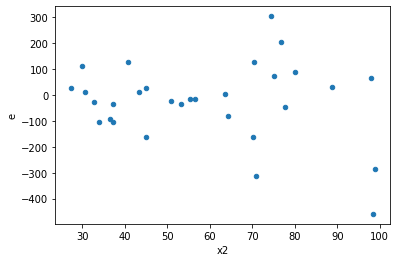

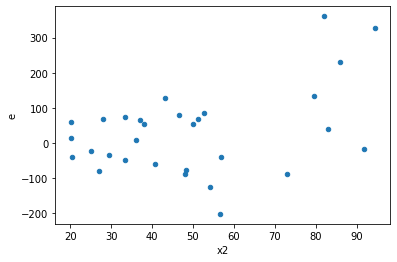

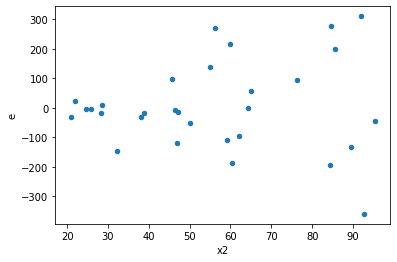

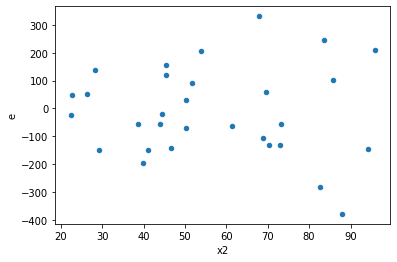

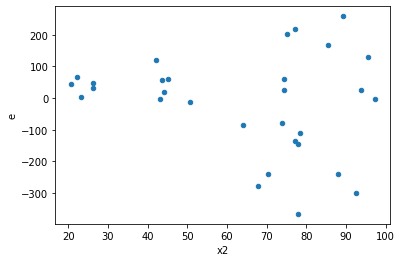

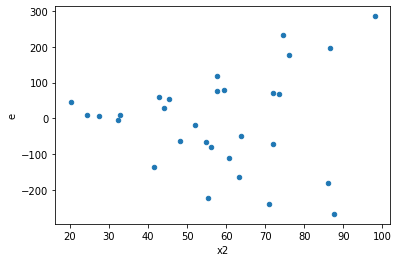

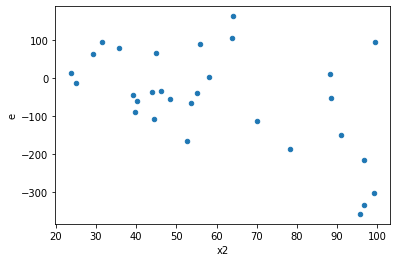

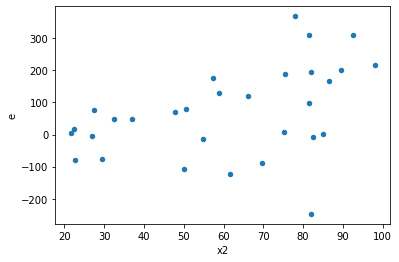

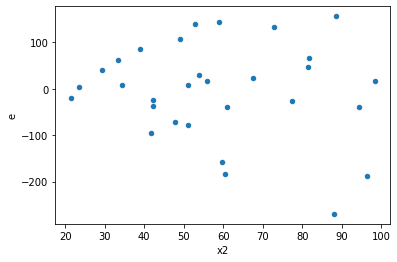

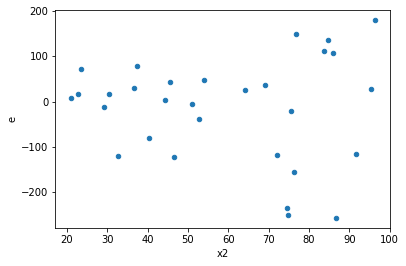

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,349682.55417691905,67183.86830105098,43710.31927211488,8397.983537631373,5.204858889785732,0.021945090735535633,0.9890274546322322,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,110446.167846463,26662.025135100634,13805.770980807874,3332.753141887579,4.142452318862317,0.04578757461481042,0.9771062126925948,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,389751.1163570644,40391.68900934211,48718.88954463305,5048.961126167764,9.64928988898978,0.0023880671752536387,0.9988059664123732,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,388433.9090866051,126141.74406950141,48554.23863582564,15767.718008687676,3.0793446844415464,0.10922124557573087,0.9453893772121346,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,155877.77158580854,21054.322115344305,19484.721448226068,2631.790264418038,7.40359963772975,0.0064123696664044605,0.9967938151667978,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,371964.6320217081,29156.059086544064,46495.579002713515,3644.507385818008,12.757712930873263,0.0008047403743036696,0.9995976298128482,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,223221.88411521135,38858.929098330365,27902.73551440142,4857.366137291296,5.744416773564725,0.015720798782391965,0.992139600608804,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,248601.77657992044,36966.42472096265,31075.222072490054,4620.803090120331,6.725069531513152,0.009062344444873194,0.9954688277775634,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,181569.00599256903,34843.12160965223,22696.12574907113,4355.390201206529,5.211043029573758,0.02185832636786378,0.9890708368160681,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,349682.55417691905,67183.86830105098,43710.31927211488,8397.983537631373,5.204858889785732,0.021945090735535633,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,110446.167846463,26662.025135100634,13805.770980807874,3332.753141887579,4.142452318862317,0.04578757461481042,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,389751.1163570644,40391.68900934211,48718.88954463305,5048.961126167764,9.64928988898978,0.0023880671752536387,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,388433.9090866051,126141.74406950141,48554.23863582564,15767.718008687676,3.0793446844415464,0.10922124557573087,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,155877.77158580854,21054.322115344305,19484.721448226068,2631.790264418038,7.40359963772975,0.0064123696664044605,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,371964.6320217081,29156.059086544064,46495.579002713515,3644.507385818008,12.757712930873263,0.0008047403743036696,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,223221.88411521135,38858.929098330365,27902.73551440142,4857.366137291296,5.744416773564725,0.015720798782391965,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,248601.77657992044,36966.42472096265,31075.222072490054,4620.803090120331,6.725069531513152,0.009062344444873194,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,181569.00599256903,34843.12160965223,22696.12574907113,4355.390201206529,5.211043029573758,0.02185832636786378,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    503
Reject001=1 : Homoscedasticity      497
Name: Result_test, dtype: int64